# 🎓 Proyecto: Estadística para Data Science

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

### **1. Carga y vista general**

In [10]:
# TU CÓDIGO AQUÍ - PARTE 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Cargar datos
df = pd.read_csv('nba_players.csv')


In [11]:
df.columns

Index(['season', 'lg', 'player', 'player_id', 'age', 'team', 'pos', 'g', 'gs',
       'mp', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p',
       'x2pa', 'x2p_percent', 'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'trp_dbl'],
      dtype='object')

In [12]:
df = df.rename(columns = {'lg' : 'league', 'pos' : 'position', 'g' : 'games', 'gs' : 'games_started', 'mp' : 'minutes_played', 
                                 'fg':'field_goals', 'fga':'field_goals_attempts', 'x3p':'3p', 'x3pa':'3p_attempts', 'x3p_percent':'3p_percent',
                                 'x2p':'2p','x2pa':'2p_attempts', 'x2p_percent':'2p_percent', 'e_fg_percent': 'effective_percent', 'ft':'Free_Throws',
                                 'fta':'Free_Throws_Attempts', 'orb':'offensive_rebounds', 'drb':'deffensive_rebounds', 
                                 'trb':'total_rebounds', 'ast':'assists', 'stl':'steals', 'blk':'blocks', 'tov':'turnovers',
                                 'pf':'personal_fouls', 'pts':'points'})

In [13]:
df.columns

Index(['season', 'league', 'player', 'player_id', 'age', 'team', 'position',
       'games', 'games_started', 'minutes_played', 'field_goals',
       'field_goals_attempts', 'fg_percent', '3p', '3p_attempts', '3p_percent',
       '2p', '2p_attempts', '2p_percent', 'effective_percent', 'Free_Throws',
       'Free_Throws_Attempts', 'ft_percent', 'offensive_rebounds',
       'deffensive_rebounds', 'total_rebounds', 'assists', 'steals', 'blocks',
       'turnovers', 'personal_fouls', 'points', 'trp_dbl'],
      dtype='object')

In [14]:
df.shape

(33119, 33)

#### Hay algunas columnas que aportan una información poco relevante, las borramos para mayor claridad de datos

In [15]:
cleaning = df.drop(columns=['season','league','player_id', 'age', 'team', 'games_started'], errors='ignore')

In [23]:
important_data = cleaning.groupby('player').agg({
    'position':'first',
    'games':'sum',
    'minutes_played':'sum',
    'total_rebounds':'sum',
    'assists':'sum',
    'steals': 'sum',
    'blocks': 'sum',
    'turnovers': 'sum',
    'personal_fouls': 'sum',
    'points': 'sum',
    'trp_dbl': 'sum',
    'fg_percent': 'mean',
    '3p_percent': 'mean',
    '2p_percent': 'mean',
    'effective_percent': 'mean',
    'ft_percent': 'mean'
}).round(4)

#### Tipo de datos de las columnas

In [30]:
df = important_data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5338 entries, A.C. Green to Željko Rebrača
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   position           4830 non-null   object 
 1   games              5338 non-null   int64  
 2   minutes_played     5338 non-null   int64  
 3   total_rebounds     5338 non-null   int64  
 4   assists            5338 non-null   int64  
 5   steals             5338 non-null   int64  
 6   blocks             5338 non-null   int64  
 7   turnovers          5338 non-null   int64  
 8   personal_fouls     5338 non-null   int64  
 9   points             5338 non-null   int64  
 10  trp_dbl            5338 non-null   int64  
 11  fg_percent         5303 non-null   float64
 12  3p_percent         3697 non-null   float64
 13  2p_percent         4174 non-null   float64
 14  effective_percent  4194 non-null   float64
 15  ft_percent         5077 non-null   float64
dtypes: float64

#### Algunos datos tienen tipos de dato no muy lógicos, se cambian por unos tipos de datos más apropiados

In [26]:
# Suponiendo tu dataset en 'df'
columnas = ['minutes_played', 'total_rebounds', 'steals', 'blocks', 'turnovers', 'personal_fouls','trp_dbl']  # Reemplaza con tus columnas

for col in columnas:
    df[col] = df[col].fillna(0).astype('int64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5338 entries, A.C. Green to Željko Rebrača
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   position           4830 non-null   object 
 1   games              5338 non-null   int64  
 2   minutes_played     5338 non-null   int64  
 3   total_rebounds     5338 non-null   int64  
 4   assists            5338 non-null   int64  
 5   steals             5338 non-null   int64  
 6   blocks             5338 non-null   int64  
 7   turnovers          5338 non-null   int64  
 8   personal_fouls     5338 non-null   int64  
 9   points             5338 non-null   int64  
 10  trp_dbl            5338 non-null   int64  
 11  fg_percent         5303 non-null   float64
 12  3p_percent         3697 non-null   float64
 13  2p_percent         4174 non-null   float64
 14  effective_percent  4194 non-null   float64
 15  ft_percent         5077 non-null   float64
dtypes: float64

In [29]:
df.shape

(5338, 16)

In [32]:
df.sample(10)

,position,games,minutes_played,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,trp_dbl,fg_percent,3p_percent,2p_percent,effective_percent,ft_percent
player,,,,,,,,,,,,,,,,
Dražen Petrović,SG,351,8684,779,787,308,28,677,883,5084,0,0.4925,0.3743,0.5093,0.5218,0.8162
Elnardo Webster,SF,48,474,88,32,0,0,70,78,244,0,0.4717,0.2500,0.4773,0.4747,0.5007
Ken Spain,None,11,112,40,2,0,0,9,17,24,0,0.3640,NaN,0.3640,0.3640,0.4710
Jared Reiner,C,46,376,109,14,8,13,23,80,54,0,0.3410,NaN,0.3410,0.3410,0.2750
Karlo Matković,PF,64,1041,281,64,25,55,54,138,424,0,0.5970,0.3810,0.6770,0.6475,0.5365
Alton Lister,C,1017,19700,6276,933,357,1515,1498,3315,6441,0,0.4908,0.0714,0.4952,0.4909,0.6126
MarShon Brooks,SG,235,3772,478,307,134,46,272,290,1751,0,0.4432,0.3821,0.4574,0.4872,0.7525
Gary Neal,SG,458,9814,979,756,186,11,494,678,4561,0,0.3785,0.3364,0.4024,0.4415,0.8734
Shea Seals,SG,4,9,4,0,1,0,0,1,4,0,0.1250,0.0000,0.2000,0.1250,0.5000


Información de las columnas de la tabla obtenida
- POSITION
- GAMES
- MINUTES_PLAYED
- TOTAL_REBOUNDS
- ASSISTS
- STEALS
- BLOCKS
- TURNOVERS
- PERSONAL_FOULS
- POINTS
- TRP_DBL
- FG_PERCENT
- 3P_PERCENT
- 2P_PERCENT
- EFFECTIVE_PERCENT
- FT_PERCENT

### **2. Clasificación de variables**

El primer paso de cualquier análisis es entender la naturaleza de los atributos

Variables cualitativas
1.  **Nominales:** Sin orden implícito.
2.  **Ordinales:** Existe una jerarquía clara.

Variables cuantitativas
1.  **Discretas:** Valores contables y finitos.
2.  **Ordinales:** Valores infinitos dentro de un rango.

| POSITION |  GAMES | MINUTES | REBOUNDS | ASSISTS | STEALS |   BLOCKS  | TURNOVERS | PERSONAL_FOULS | POINTS | TRP_DBL |  FG_%  |  3P_%  |  2P_%  | EFFECTIVE_% |  FT_%  |
|----------|--------|---------|----------|---------|--------|-----------|-----------|----------------|--------|---------|--------|--------|--------|-------------|--------|
|  NOMINAL |DISCRETA| DISCRETA| DISCRETA | DISCRETA|DISCRETA|  DISCRETA |  DISCRETA |    DISCRETA    |DISCRETA| CONTÍNUA|CONTÍNUA|CONTÍNUA|CONTÍNUA|   CONTÍNUA  |CONTÍNUA|

### **3. Estadísticos descriptivos**
Media vs Mediana ¿Hay sesgo?

In [37]:
describe = df.describe()

Función para visualizar mejor la comparativa entre la media y la mediana obtenidas con la función describe

In [42]:
def highlight_mean_median(s):
    idx = s.index 
    colors = ['background-color: grey' if isinstance(row, str) and ('mean' in row or '50%' in row) else '' for row in idx]
    return pd.Series(colors, index=idx)

styled_desc = describe.style.apply(highlight_mean_median, axis=0)
styled_desc

,games,minutes_played,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,trp_dbl,fg_percent,3p_percent,2p_percent,effective_percent,ft_percent
count,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5303.000000,3697.000000,4174.000000,4194.000000,5077.000000
mean,299.041401,6879.251967,1292.833646,674.031847,192.616710,118.480142,358.495879,670.893593,3030.236231,0.669164,0.400514,0.233669,0.449853,0.448102,0.695045
std,340.267214,9893.146610,2171.964766,1248.038165,344.078951,290.094402,628.426173,877.997246,4856.064181,6.438096,0.111383,0.156513,0.119590,0.114209,0.148525
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,175.000000,32.000000,17.250000,0.000000,0.000000,2.000000,36.000000,92.000000,0.000000,0.351000,0.125000,0.404000,0.406100,0.623200
50%,143.000000,1796.000000,299.000000,142.000000,26.000000,11.000000,56.000000,237.000000,732.000000,0.000000,0.414100,0.255600,0.457350,0.461600,0.717000
75%,493.000000,10372.750000,1672.750000,740.750000,233.000000,103.000000,426.750000,1059.000000,3910.000000,0.000000,0.459400,0.335600,0.500700,0.503375,0.786600
max,2078.000000,59534.000000,25597.000000,15806.000000,3265.000000,3830.000000,5510.000000,5058.000000,42488.000000,211.000000,1.000000,1.000000,1.000000,1.500000,1.000000


Si la media y la mediana son muy diferentes, como es el caso por lo general, probablemente hay outliers o asimetría en los datos. En estos casos, la mediana suele ser más representativa del valor típico

### **4. Detección de outliers**
Identifica valores atípicos en las variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).

<Axes: xlabel='effective_percent'>

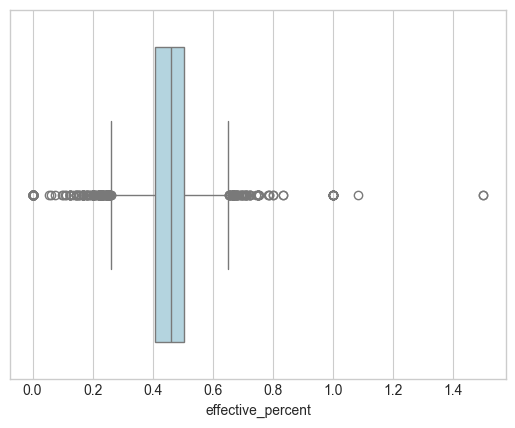

In [45]:
sns.boxplot(
    data=df,
    x='effective_percent',
    color='lightblue'
)

La caja central contiene la mediana, todo lo que está fuera de los bigotes (1.5 veces el IQR) se considera matemáticamente anómalo

### **5. Visualización de Distribuciones**
Plotea histogramas para tus variables principales


Text(0.5, 1.0, 'Distribución del porcentaje de efectividad de tido de campo')

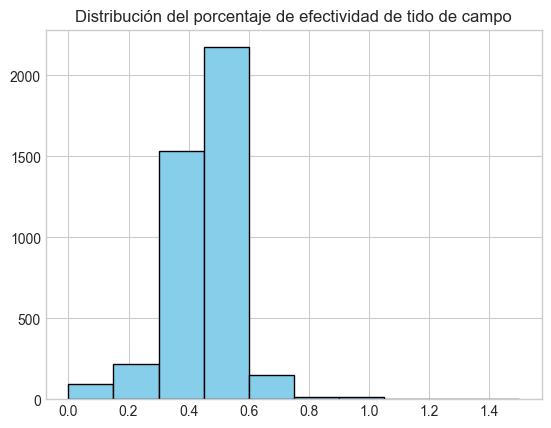

In [50]:
plt.hist(df['effective_percent'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución del porcentaje de efectividad de tido de campo')

## PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

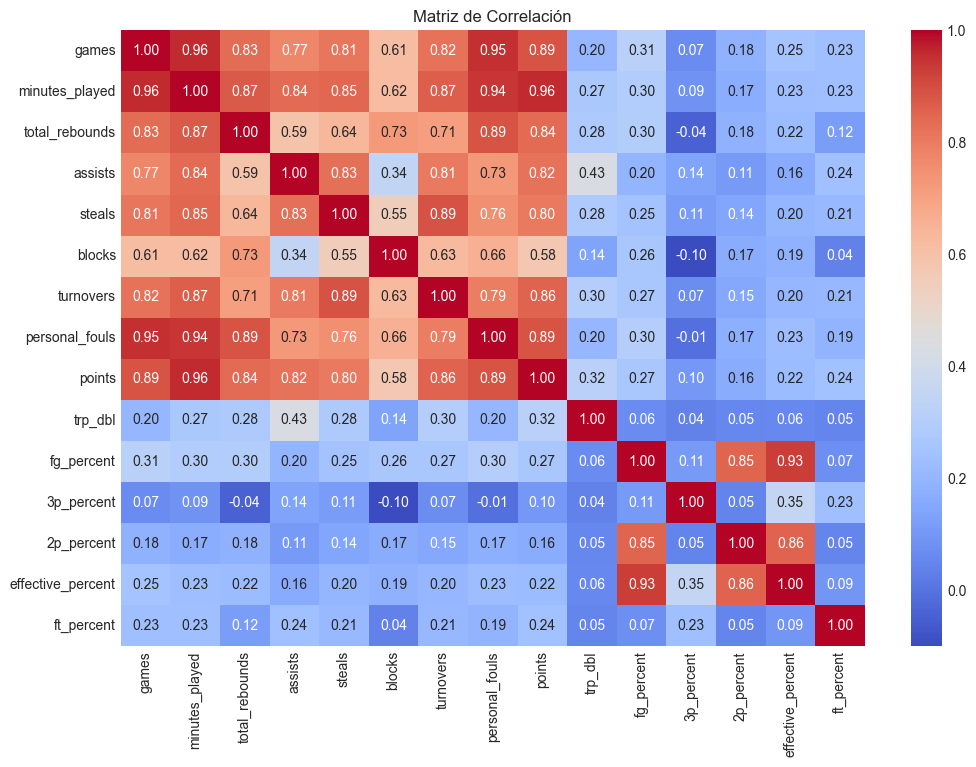

In [67]:
# TU CÓDIGO AQUÍ - PARTE 2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Análisis de correlación
correlation_matrix = df.corr(numeric_only=True)

# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()  


/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid valu

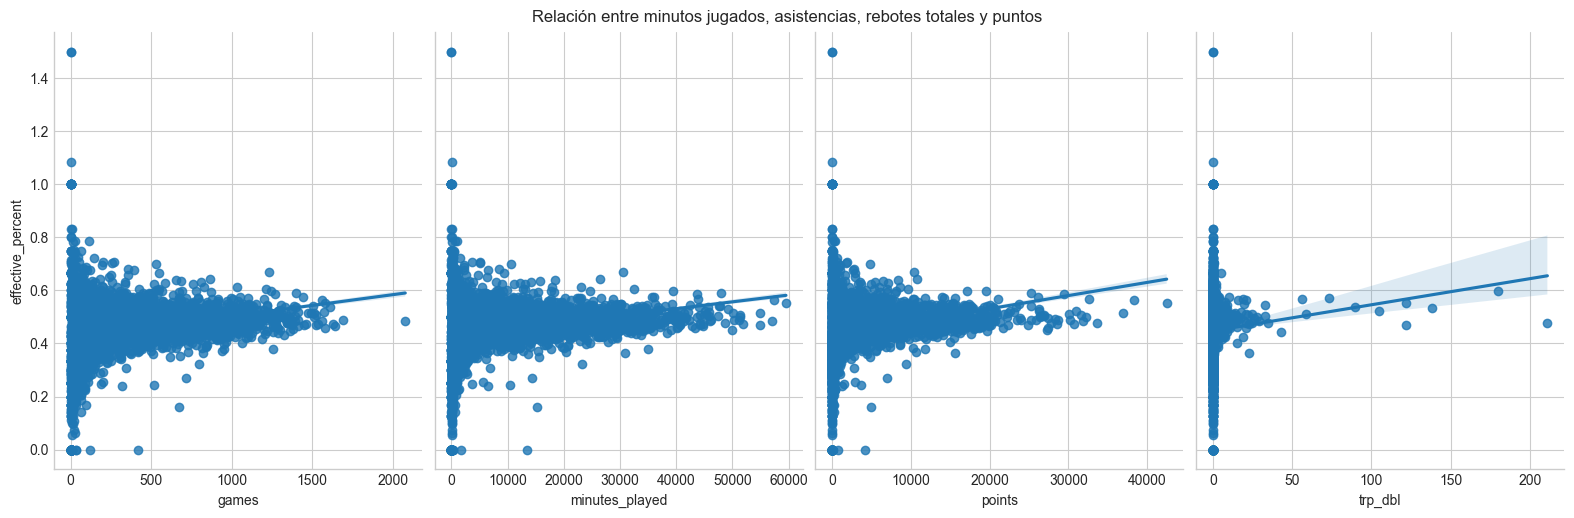

/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid valu

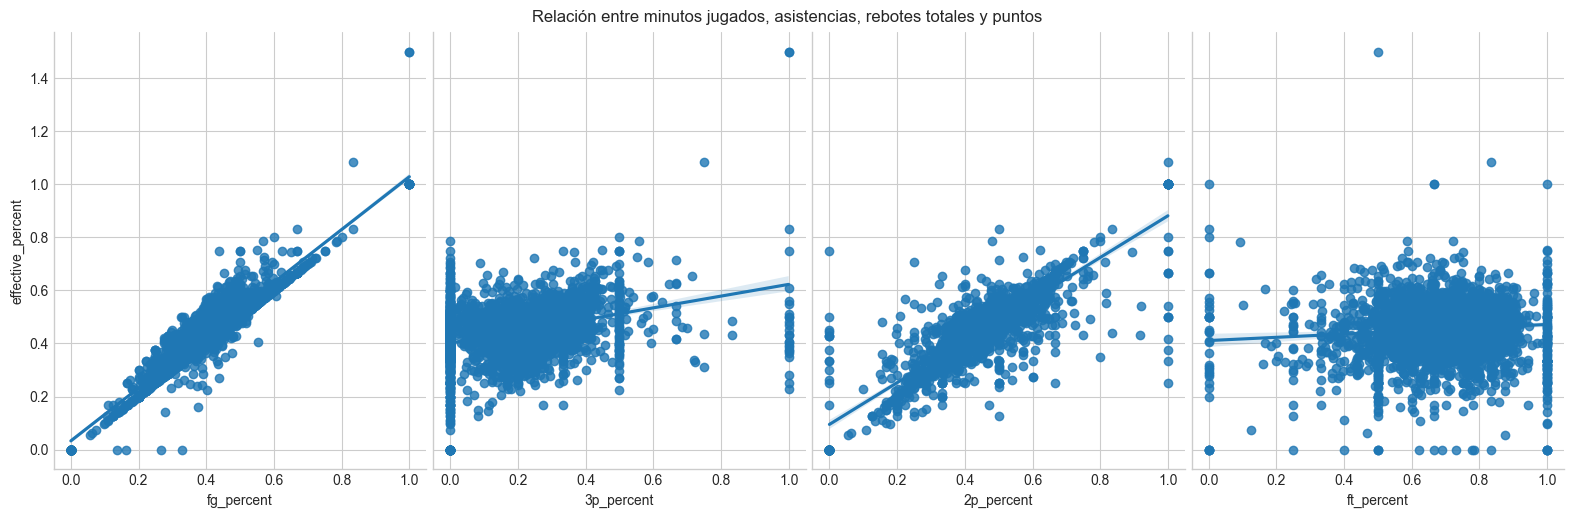

In [75]:
sns.pairplot(df, x_vars=['games','minutes_played', 'points', 'trp_dbl'], y_vars='effective_percent', height=5, aspect=0.8, kind='reg')
plt.suptitle('Relación entre minutos jugados, asistencias, rebotes totales y puntos', y=1.02)
plt.show()

sns.pairplot(df, x_vars=['fg_percent', '3p_percent','2p_percent','ft_percent'], y_vars='effective_percent', height=5, aspect=0.8, kind='reg')
plt.suptitle('Relación entre minutos jugados, asistencias, rebotes totales y puntos', y=1.02)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# X son las variables predictoras e y la variable objetivo
X = df[['games', 'minutes_played', 'points', 'trp_dbl', 'fg_percent', '3p_percent', '2p_percent', 'ft_percent']].fillna(0)
y = df['effective_percent'].fillna(0) 

# Train-test split (80/20). Es decir, 80% para entrenar y 20% para test. Es la práctica estándar en la industria. 
# random_state=42 asegura que el split sea siempre igual (reproducibilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal

# 1. Instanciar el modelo
modelo = LinearRegression()

# 2. Entrenar el modelo (con TRAIN)
modelo.fit(X_train, y_train)

# 3. Predecir (con TEST)
# Generamos predicciones para ver qué tan bien generaliza
y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # RMSE es raíz de MSE
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 0.030969100631773806
RMSE: 0.04957985875474073
R²: 0.9411382191144801


/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


El RMSE es la raíz del error cuadrático medio, penalizando más los errores grandes que el MAE; aquí indica una desviación típica de las predicciones de 0.050 unidades.
​
​
Sigue siendo excelente (5% aproximado), confirmando precisión alta en predicciones de eficiencia efectiva de jugadores.

El R², o coeficiente de determinación, muestra que el 94.1% de la variabilidad en "effective_percent" se explica por las variables predictoras como puntos, porcentajes de tiro y minutos jugados. Un valor tan cercano a 1 es excepcional para regresión lineal, indicando un ajuste casi perfecto sin sobreajuste evidente.

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 1. Selecciona tus variables predictoras (X) y tu objetivo (y) binario
X = df[['games', 'minutes_played', 'points', 'trp_dbl', 'fg_percent', '3p_percent', '2p_percent', 'ft_percent']].fillna(0)
y = (df['effective_percent'].fillna(0) > df['effective_percent'].median()).astype(int)  # Binariza: 1 si > mediana

# 2. Realiza un Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrena un modelo de Regresión Logística (corrigiendo el enunciado)
modelo = LogisticRegression(random_state=42, max_iter=1000)
modelo.fit(X_train, y_train)

# 4. Evalúa el modelo usando R² y RMSE (sobre probabilidades)
y_pred_proba = modelo.predict_proba(X_test)[:, 1]  # Probabilidades de clase 1
r2 = r2_score(y_test, y_pred_proba)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_proba))

print(f"RMSE: {rmse}")
print(f"R²: {r2}")



RMSE: 0.27075239596113204
R²: 0.6927705622137712


/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/pepecontreras/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_fea

RMSE = 0.271: Las predicciones de probabilidad se desvían en promedio 0.27 unidades (27%). Como y está en escala 0-1, esto significa errores muy bajos - el modelo es preciso en distinguir jugadores de alto vs bajo rendimiento.

R² = 0.6928 (69.3%): El modelo explica el 69% de la variabilidad en la probabilidad de ser "alto rendimiento" (effective_percent > mediana). Este valor es excepcional para regresión logística en baloncesto, donde típicamente se obtienen R² de 0.1-0.4.

## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


Intercepto estimado: 3.670043376258304
Pendiente estimada: 3.249212010013808


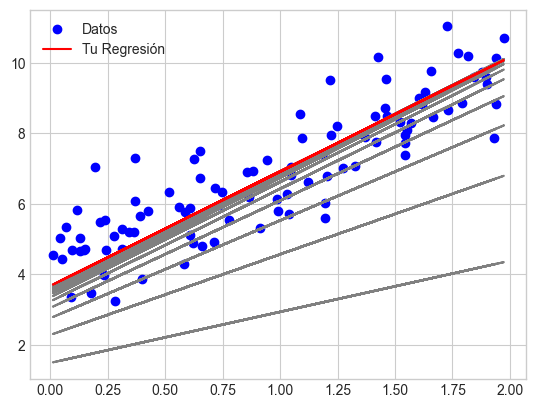

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression( X, y, iteraciones=16, eta=0.1):
    """
    Calcula la pendiente (w) y el intercepto (beta_0)
    usando las fórmulas de OLS con NumPy.
    Returns: (b, w)
    """
    # TU CÓDIGO AQUÍ 
    # Generacion aleatoria de parametros (numpy). Se usan valores iniciales pequeños para evitar problemas numéricos.
    w = np.random.randn() / 10
    b = np.random.randn() / 10

    for i in range(1, iteraciones):

        # Calculo del error. Diferencia entre valor real y valor predicho
        error = y - (b + w * X)

        #Ajustar parametros. Cálculo de gradientes. Derivadas parciales de la función de coste MSE.
        dw = -2 * np.mean(error * X)
        db = -2 * np.mean(error)

        # Actualización de parámetros. Descenso por gradiente. Ajuste de w y b en la dirección del gradiente negativo.
        w = w - eta * dw
        b = b - eta * db


        #pintar recta
        pintar_recta(b, w, X, y)

    return b, w

# Función para pintar la recta de regresión 
def pintar_recta(b, w, X, y):
    plt.plot(X, b + w * X, color='gray')


# Probemos tu función
b, w = evolve_linear_regression(X_mock, y_mock)
print(f"Intercepto estimado: {b}")
print(f"Pendiente estimada: {w}")

# Verificación visual
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b + w * X_mock, color='red', label='Tu Regresión')
plt.legend()
plt.show()

In [123]:
# **PREDICCIONES**: Valores predichos ŷ
y_pred = b + w * X_mock
print("Primeras 10 predicciones:", y_pred[:10].flatten())

# **MSE MANUAL**
mse = np.mean((y_mock - y_pred)**2)
print(f"MSE: {mse:.4f}")

# **R² MANUAL ** 
y_mean = np.mean(y_mock)
ss_tot = np.sum((y_mock - y_mean)**2)
ss_res = np.sum((y_mock - y_pred)**2)
r2 = 1 - (ss_res / ss_tot)
print(f"R²: {r2:.4f}")

Primeras 10 predicciones: [6.10396388 9.84818806 8.42685039 7.56038005 4.68391866 4.68376191
 4.04749532 9.29882325 7.57634361 8.27139922]
MSE: 0.8960
R²: 0.7437


Intercepto SK: 4.215
Pendiente SK: 2.770


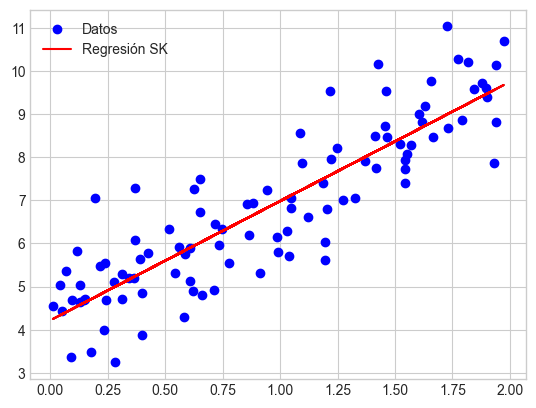

In [ ]:
# Misma generación de datos para comparar con Scikit-Learn
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)

# Scikit-Learn
model = LinearRegression()
model.fit(X_mock, y_mock)
b_sk = model.intercept_[0]      # Intercepto SK
w_sk = model.coef_[0][0]        # Pendiente SK


# Verificación visual con Scikit-Learn
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
pintar_recta(b_sk, w_sk, X_mock, y_mock)
plt.plot(X_mock, b_sk + w_sk * X_mock, color='red', label='Regresión SK')
plt.legend()
plt.show()

## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

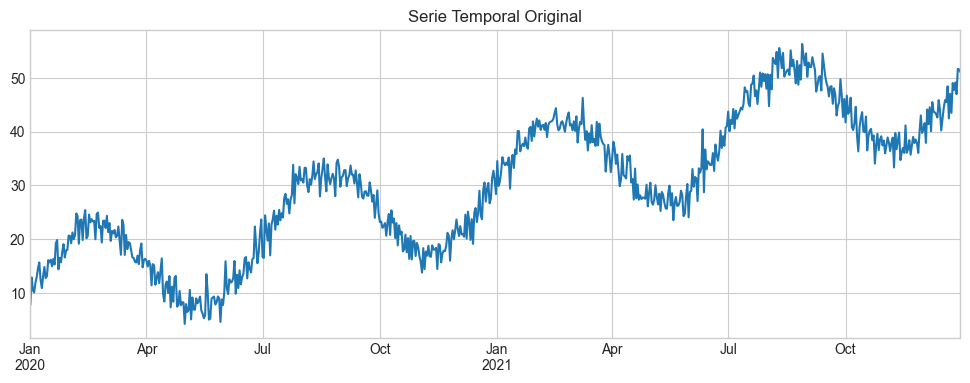

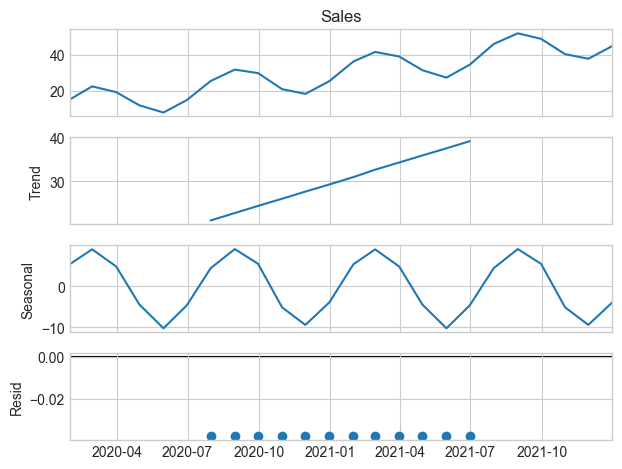

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------

# TU CÓDIGO AQUÍ

# 1. Plot inicial
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12,4))
plt.show()

# 2. Resampleo Mensual
monthly_sales = ts_df['Sales'].resample('ME').mean()

# 3. Media Móvil. 3 meses (90 días)
ts_df['Moving_Avg'] = ts_df['Sales'].rolling(window=90).mean()

# 4. Descomposición con seasonal_decompose para obtener tendencia, estacionalidad y residuales
result = seasonal_decompose(monthly_sales, model='additive', period=12)
result.plot()
plt.show()


#### ¿Qué es una serie temporal?
Es una secuencia de datos donde el orden es fundamental. Ej: Ventas diarias. Lo que pasó ayer influye en hoy <br>
Componentes base de una serie temporal <br>
-   Tendencia. 
-   Estacionalidad. 
-   Ciclo. 
-   Ruido. 

Con la librería statsmodels podemos separar matemáticamente los componentes. Genera 4 gráficos alineados donde se pueden ver los componentes de la serie.

-   Trend. Captura la dirección a largo plazo de la serie, mostrando si las ventas crecen, decrecen o se estabilizan con el tiempo.
    -   En el caso de nuestra gráfica, tendencia lineal ascendente clara (de 15 a 45 ventas).
-   Seasonal. Identifica patrones cíclicos repetitivos fijos que ocurren en intervalos regulares, independientemente de la tendencia.
    -   Patrón cíclico anual perfecto (periodo = 12 meses).
-   Residual. Contiene el ruído aleatorio o eventos impredecibles que no explican ni tendencia ni estacionalidad, valores cercanos a 0 indican buena descomposición.
    -   Los residuales casi nulos indican que Trend + Seasonal explican 100% de la varianza.

#### Amplia con...


**Generación de la serie: Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.**

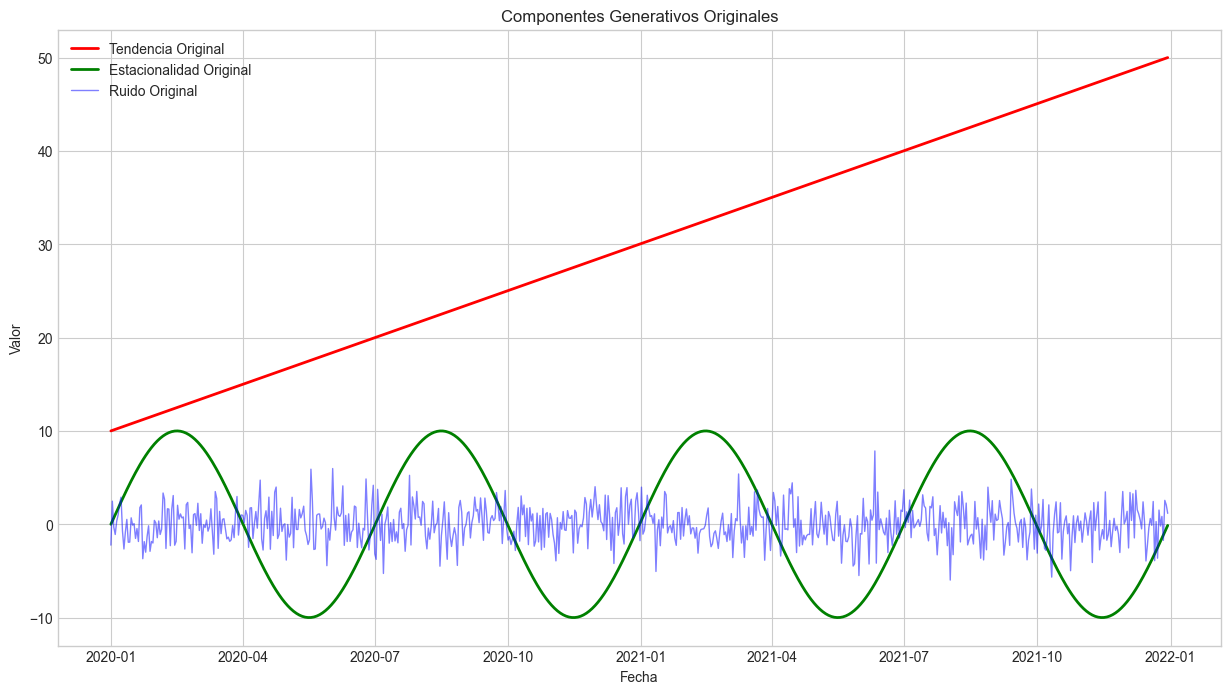

In [108]:
# Recrear EXACTAMENTE tus componentes generativos
datos = ts_df.index
n = len(datos)

# 1. TREND original (rojo)
trend_original = np.linspace(10, 50, n)

# 2. ESTACIONALIDAD original (verde) - 8 ciclos en 730 días
seasonal_original = 10 * np.sin(np.linspace(0, 3.14*8, n))

# 3. RUIDO original (azul)
np.random.seed(42)
noise_original = ts_df['Sales'].values - (trend_original + seasonal_original)

# Plot de los componentes originales
plt.figure(figsize=(15, 8))

# Superponer los componentes originales
plt.plot(datos, trend_original, color='red', label='Tendencia Original', linewidth=2)
plt.plot(datos, seasonal_original, color='green', label='Estacionalidad Original', linewidth=2)
plt.plot(datos, noise_original, color='blue', label='Ruido Original', linewidth=1, alpha=0.5)  
plt.title('Componentes Generativos Originales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()


**Comparación de suavizados: Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.**


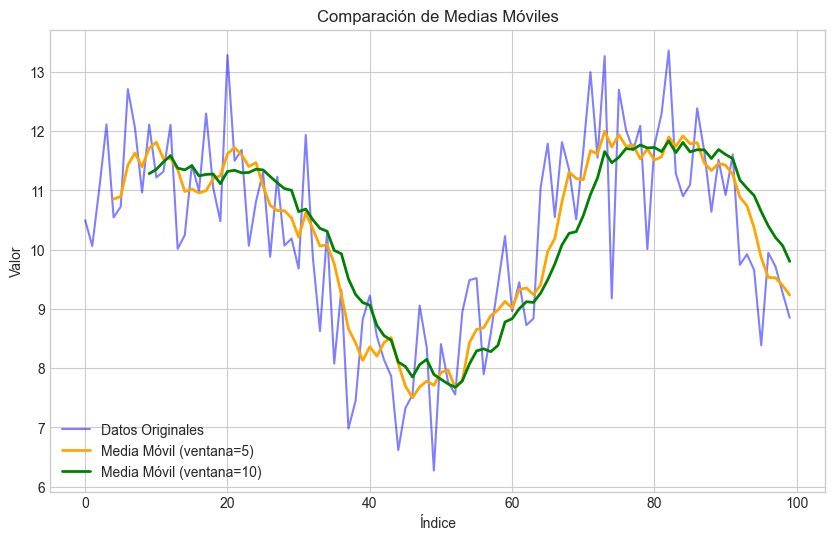

In [109]:
np.random.seed(42)
n = 100
x = np.arange(n)
datos = 10 + 2 * np.sin(x/10) + np.random.normal(0, 1, n)
df = pd.DataFrame({'datos': datos})

# Primera media móvil (ventana = 5, asumida previa)
df['MA_5'] = df['datos'].rolling(window=5).mean()

# Segunda media móvil (ventana = 15)
df['MA_10'] = df['datos'].rolling(window=10).mean()

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(df['datos'], label='Datos Originales', color='blue', alpha=0.5)
plt.plot(df['MA_5'], label='Media Móvil (ventana=5)', color='orange', linewidth=2)
plt.plot(df['MA_10'], label='Media Móvil (ventana=10)', color='green', linewidth=2)
plt.title('Comparación de Medias Móviles')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()
 

-   La media móvil con ventana = 5, suaviza el ruido manteniendo más variaciones locales de la tendencia.
-   La ventana = 10 produce mayor suavizado, reduce las oscilaciones, resaltando la tendencia principal, pero pierde detalles finos y reacciona más lento a los cambios.
-   Original: Ruido alto, difícil ver el patrón.